In [1]:
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def round_channels(img, threshold):
    x_size, y_size, num_channels = img.shape
    
    for i in range(x_size):
        for j in range(y_size):
            for c in range(num_channels):
                
                # Round each number to either 0 or 255, depending on the value of this channel.
                cur_val = img[i,j,c]
                new_val = 0
                
                if cur_val >= threshold:
                    new_val = 255
                    
                img[i, j, c] = new_val

In [19]:
def pix_sqrd_distance(rpix, lpix):
    ''' Finds the vector distance between two pixels.'''
    
    dist_sqrd = (rpix[0]-lpix[0])**2 + (rpix[1]-lpix[1])**2 + 
                (rpix[2]-lpix[2])**2
    
    return dist_sqrd

def find_average_pixel(pix_array):
    '''Given an array or list of pixels, finds the average pixel of that group.'''
    
    avg_pix = [0,0,0]
    
    for pixel in pix_array:
        
        for i in range(3):
            avg_pix[i] = avg_pix[i] + pixel[i]
            
    for i in range(len(avg_pix)):
        avg_pix[i] = avg_pix[i] / len(pix_array)
        
    return np.array(avg_pix, np.uint8)

def get_starter_palette(img, n):
    x_size, y_size, n_channels = img.shape
    partition_value = np.ceil()

def img_to_kmean(img, k, iterations):
    ''' Converts an image array to a k-means generated array and key set. K-Means is a method used to find k averages
    that are representative of a set. Each set item is closest to one of these means, functionally separating the data
    into k different clusters.
    
    This method takes in an image, a number of clusters, and a number of iterations. Using k-means, the image will be
    compressed into k types of pixels. A key with the means, and an array with the corresponding key value of each pixel
    is returned.'''
    
    x_size, y_size, n_channels = img.shape
    
    centroids = []
    
    # Create some starter means. These will be selected at even intervals throughout the image
    for _ in range(k):
        new_centroid = img[
                            np.random.randint(0, x_size),
                            np.random.randint(0, y_size)
                          ]
        centroids.append(new_centroid)
        
    
    # Create a numpy array to store results.
    result = np.zeros((x_size, y_size), np.uint8)

    # Because k-means is an iterative process, we'll iterate the mean generation some amount of times.
    for iter in range(iterations):
        
        print("Beginning iteration %i" % iter)
        
        # Create a list to contain k groups
        groups = []
        
        # add empty lists for each group.
        for m in range(len(centroids)):
            groups.append([])
        
        # group each pixel by which mean they're closest to
        for i in range(x_size):
            
            for j in range(y_size):
                
                curr_pixel = img[i,j]
                
                i_closest = 0
                dist_closest = 9999
                
                for c, cent in enumerate(centroids):
                    dist_to_pix = pix_sqrd_distance(cent, curr_pixel)
                    
                    if dist_to_pix < dist_closest:
                        i_closest = c
                        dist_closest = dist_to_pix
                        
                #print("(%i, %i) set to %i" % (i, j, i_closest))
                        
                groups[i_closest].append(curr_pixel)
                result[i,j] = i_closest
                
        for i, group in enumerate(groups):
            if len(group) > 0:
                centroids[i] = find_average_pixel(group)
                
        print("Iteration %i complete" % iter)
            
    return (np.array(centroids), result)


def kmean_to_img(key, data):
    
    x_size, y_size = data.shape
    
    result = np.zeros((x_size, y_size, 3), np.uint8)
    
    for i in range(x_size):
        for j in range(y_size):
            
            result[i,j] = key[data[i,j]]
            
    return result

Beginning iteration 0


/home/spelkington/Repos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


Iteration 0 complete
Beginning iteration 1
Iteration 1 complete
Beginning iteration 2
Iteration 2 complete
Beginning iteration 3
Iteration 3 complete
Beginning iteration 4
Iteration 4 complete
Beginning iteration 5
Iteration 5 complete
Beginning iteration 6
Iteration 6 complete
Beginning iteration 7
Iteration 7 complete
Original image size:	 12288
Compressed image size:	 4192
Compression percent: 65.885417.2


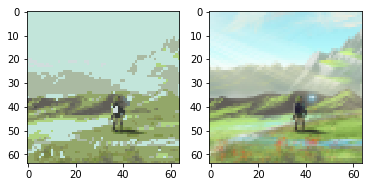

In [20]:
# Load in the image.
img = cv.imread('hyrule_small.png')

key, data = img_to_kmean(img, 32, 8)

recreated = kmean_to_img(key, data)

print("Original image size:\t %i" % img.size)
print("Compressed image size:\t %i" % (key.size + data.size))

compression_ratio = 100 - 100 * ((0.0 + key.size + data.size) / img.size)

print("Compression percent: %f.2" % compression_ratio)

plt.subplot(121), plt.imshow(cv.cvtColor(recreated, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()